### Ensemble

- To improve robustness and generalization, combine prediction values from various models. 

- 2 types of ensemble : Average, Boosting


- Voting vs Voting on Bagging? 

    - voting uses identical dataset (100%) and train on different models and decide through voting 
    - Voting while bagging uses randomly sampled partial dataset and train on same model and decide through voting

#### Bagging meta-estimator 
- Bootstrap aggregating
    - 모수의 분포를 추정하는 파워풀한 방법은 현재있는 표본에서 추가적으로 표본을 복원 추출하고 각 표본에 대한 통계량 다시 계산. 이러한 절차를 부트스트랩이라 한다. 
- Use parts of original training dataset to train several models
- produce final results aggregating each result
- reduce variance, prevent overfitting
- Works well on complex models

In [192]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [193]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [194]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Load datasets

In [195]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

### Iris data

In [196]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [197]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5)

In [198]:
cross_val

{'fit_time': array([0.02100563, 0.00100017, 0.        , 0.00100064, 0.00100183]),
 'score_time': array([0.01100183, 0.00099945, 0.00199986, 0.00300145, 0.00200129]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

In [199]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0048017, (+/- 0.0081113)
avg score time: 0.0038008, (+/- 0.0036558)
avg test score: 0.9600000, (+/- 0.0249444)


In [200]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5)

In [201]:
cross_val

{'fit_time': array([0.02800512, 0.01400352, 0.01500392, 0.0160141 , 0.01401615]),
 'score_time': array([0.00900388, 0.00800133, 0.00600219, 0.00498915, 0.00598955]),
 'test_score': array([0.9       , 0.96666667, 0.93333333, 0.9       , 1.        ])}

In [202]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0174086, (+/- 0.0053501)
avg score time: 0.0067972, (+/- 0.0014746)
avg test score: 0.9400000, (+/- 0.0388730)


#### Wine data

In [203]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [204]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5)

In [205]:
cross_val

{'fit_time': array([0.00099969, 0.0009985 , 0.00100064, 0.        , 0.00099969]),
 'score_time': array([0.002002  , 0.00200057, 0.00099969, 0.00199986, 0.00199986]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [206]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0007997, (+/- 0.0003999)
avg score time: 0.0018004, (+/- 0.0004004)
avg test score: 0.9493651, (+/- 0.0379109)


In [207]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5)

In [208]:
cross_val

{'fit_time': array([0.01499653, 0.01300478, 0.01199675, 0.01800275, 0.01600671]),
 'score_time': array([0.00400066, 0.00701547, 0.00599408, 0.00601745, 0.0060184 ]),
 'test_score': array([0.86111111, 0.91666667, 1.        , 1.        , 0.97142857])}

In [209]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0148015, (+/- 0.0021370)
avg score time: 0.0058092, (+/- 0.0009846)
avg test score: 0.9498413, (+/- 0.0537985)


#### Breast Cancer data

In [210]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [211]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [212]:
cross_val

{'fit_time': array([0.00200009, 0.00099993, 0.00100064, 0.0010016 , 0.00199986]),
 'score_time': array([0.0230062 , 0.00400138, 0.00399971, 0.00299835, 0.00399876]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [213]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0014004, (+/- 0.0004895)
avg score time: 0.0076009, (+/- 0.0077124)
avg test score: 0.9648502, (+/- 0.0096100)


In [214]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [215]:
cross_val

{'fit_time': array([0.02100325, 0.01800323, 0.01600337, 0.01600695, 0.02200675]),
 'score_time': array([0.01300359, 0.01100254, 0.01100254, 0.01400042, 0.0150013 ]),
 'test_score': array([0.95614035, 0.94736842, 0.98245614, 0.95614035, 0.96460177])}

In [216]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0186047, (+/- 0.0024982)
avg score time: 0.0128021, (+/- 0.0015994)
avg test score: 0.9613414, (+/- 0.0118811)


#### SVC

In [217]:
base_model = make_pipeline(
    StandardScaler(),
    SVC())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [218]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5)

In [219]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0028008, (+/- 0.0026381)
avg score time: 0.0007998, (+/- 0.0007485)
avg test score: 0.9666667, (+/- 0.0210819)


In [220]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5)

In [221]:
cross_val

{'fit_time': array([0.02500367, 0.02199912, 0.0230186 , 0.02198887, 0.02099895]),
 'score_time': array([0.00400257, 0.00299835, 0.00300503, 0.00401211, 0.00200605]),
 'test_score': array([0.93333333, 0.96666667, 0.86666667, 0.9       , 1.        ])}

In [222]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0226018, (+/- 0.0013602)
avg score time: 0.0032048, (+/- 0.0007494)
avg test score: 0.9333333, (+/- 0.0471405)


#### Wine data

In [223]:
base_model = make_pipeline(
    StandardScaler(),
    SVC())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [224]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5)

In [225]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0012001, (+/- 0.0003995)
avg score time: 0.0010001, (+/- 0.0006326)
avg test score: 0.9833333, (+/- 0.0222222)


In [226]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5)

In [227]:
cross_val

{'fit_time': array([0.02402616, 0.02400923, 0.02501345, 0.02100539, 0.01999211]),
 'score_time': array([0.0029881 , 0.00399566, 0.00300312, 0.00318694, 0.00399995]),
 'test_score': array([0.94444444, 0.97222222, 0.94444444, 0.94285714, 1.        ])}

In [228]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0228093, (+/- 0.0019478)
avg score time: 0.0034348, (+/- 0.0004650)
avg test score: 0.9607937, (+/- 0.0224680)


#### Breast cancer data

In [229]:
base_model = make_pipeline(
    StandardScaler(),
    SVC())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [230]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [231]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0038012, (+/- 0.0004007)
avg score time: 0.0018031, (+/- 0.0003968)
avg test score: 0.9736376, (+/- 0.0146785)


In [232]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [233]:
cross_val

{'fit_time': array([0.02901793, 0.02776027, 0.02600718, 0.02402377, 0.02501178]),
 'score_time': array([0.01099062, 0.01000166, 0.00998807, 0.00999093, 0.00900197]),
 'test_score': array([0.95614035, 0.96491228, 0.98245614, 0.96491228, 0.97345133])}

In [234]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0263642, (+/- 0.0018125)
avg score time: 0.0099946, (+/- 0.0006289)
avg test score: 0.9683745, (+/- 0.0089187)


### Decision Tree

In [235]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [236]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5)

In [237]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0028004, (+/- 0.0036003)
avg score time: 0.0002002, (+/- 0.0004004)
avg test score: 0.9600000, (+/- 0.0326599)


In [238]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5)

In [239]:
cross_val

{'fit_time': array([0.01901364, 0.01799655, 0.01601076, 0.01700568, 0.01600432]),
 'score_time': array([0.00199556, 0.00200748, 0.00199938, 0.0010004 , 0.00100088]),
 'test_score': array([0.96666667, 0.96666667, 0.86666667, 0.93333333, 1.        ])}

In [240]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0172062, (+/- 0.0011666)
avg score time: 0.0016007, (+/- 0.0004900)
avg test score: 0.9466667, (+/- 0.0452155)


#### Wine data

In [241]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [242]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5)

In [243]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0011991, (+/- 0.0003998)
avg score time: 0.0002000, (+/- 0.0004000)
avg test score: 0.8765079, (+/- 0.0332145)


In [244]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5)

In [245]:
cross_val

{'fit_time': array([0.02500534, 0.02100348, 0.02000308, 0.01899767, 0.01900244]),
 'score_time': array([0.00200248, 0.00100136, 0.00200152, 0.00200105, 0.00099993]),
 'test_score': array([0.91666667, 0.88888889, 0.97222222, 0.94285714, 0.94285714])}

In [246]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0208024, (+/- 0.0022289)
avg score time: 0.0016013, (+/- 0.0004904)
avg test score: 0.9326984, (+/- 0.0280885)


#### Breast Cancer data

In [247]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [248]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [249]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0055993, (+/- 0.0004887)
avg score time: 0.0004015, (+/- 0.0004917)
avg test score: 0.9120789, (+/- 0.0178486)


In [250]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [251]:
cross_val

{'fit_time': array([0.03136635, 0.03100753, 0.0270195 , 0.04100132, 0.04501009]),
 'score_time': array([0.00299931, 0.00199842, 0.00198793, 0.00200009, 0.00200367]),
 'test_score': array([0.92105263, 0.93859649, 0.99122807, 0.96491228, 0.98230088])}

In [252]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0350810, (+/- 0.0067678)
avg score time: 0.0021979, (+/- 0.0004007)
avg test score: 0.9596181, (+/- 0.0263474)


#### Regression using Bagging 

In [253]:
boston = load_boston()
diabetes = load_diabetes()

C:\Users\wk789\Miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [254]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [255]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5)

In [256]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0013990, (+/- 0.0004905)
avg score time: 0.0012012, (+/- 0.0004002)
avg test score: 0.4735775, (+/- 0.1324312)


In [257]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5)

In [258]:
cross_val

{'fit_time': array([0.01600909, 0.01600003, 0.01401806, 0.01200843, 0.01300263]),
 'score_time': array([0.0059948 , 0.00699258, 0.00599289, 0.00600219, 0.00600123]),
 'test_score': array([0.65735697, 0.54842336, 0.19473797, 0.37452344, 0.36335417])}

In [259]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0142076, (+/- 0.0015989)
avg score time: 0.0061967, (+/- 0.0003979)
avg test score: 0.4276792, (+/- 0.1603471)


#### Diabetes data

In [260]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [261]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [262]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0010026, (+/- 0.0000061)
avg score time: 0.0015970, (+/- 0.0004938)
avg test score: 0.3689721, (+/- 0.0446590)


In [263]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [264]:
cross_val

{'fit_time': array([0.01602006, 0.01700473, 0.01500392, 0.01200175, 0.01300573]),
 'score_time': array([0.00698996, 0.00600839, 0.00500011, 0.00498867, 0.00698662]),
 'test_score': array([0.38255136, 0.4674174 , 0.39609116, 0.41553163, 0.44283873])}

In [265]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0146072, (+/- 0.0018577)
avg score time: 0.0059947, (+/- 0.0008917)
avg test score: 0.4208861, (+/- 0.0308548)


### SVR

In [266]:
base_model = make_pipeline(
    StandardScaler(),
    SVR())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [267]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5)

In [268]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0072053, (+/- 0.0007463)
avg score time: 0.0043968, (+/- 0.0004888)
avg test score: 0.1763127, (+/- 0.5224915)


In [269]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5)

In [270]:
cross_val

{'fit_time': array([0.03000069, 0.03501844, 0.03102064, 0.02800417, 0.02600026]),
 'score_time': array([0.02100348, 0.01900482, 0.0200069 , 0.0200181 , 0.01800418]),
 'test_score': array([ 0.53796608,  0.33120758, -0.3003275 ,  0.25372541, -0.06761707])}

In [271]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0300088, (+/- 0.0030400)
avg score time: 0.0196075, (+/- 0.0010209)
avg test score: 0.1509909, (+/- 0.2980805)


#### Diabetes

In [272]:
base_model = make_pipeline(
    StandardScaler(),
    SVR())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [273]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [274]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0048002, (+/- 0.0003999)
avg score time: 0.0034017, (+/- 0.0004908)
avg test score: 0.1465994, (+/- 0.0219080)


In [275]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [276]:
cross_val

{'fit_time': array([0.02701735, 0.023     , 0.02501225, 0.02201033, 0.02301598]),
 'score_time': array([0.01400304, 0.01599073, 0.01510644, 0.01499248, 0.01400352]),
 'test_score': array([0.0590429 , 0.0889005 , 0.10535639, 0.04307548, 0.06885172])}

In [277]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0240112, (+/- 0.0017920)
avg score time: 0.0148192, (+/- 0.0007505)
avg test score: 0.0730454, (+/- 0.0219419)


#### Decision Regressor

In [278]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [279]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5)

In [280]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0032001, (+/- 0.0003989)
avg score time: 0.0003998, (+/- 0.0004897)
avg test score: 0.0609517, (+/- 0.9585920)


In [281]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5)

In [282]:
cross_val

{'fit_time': array([0.02400756, 0.02401304, 0.02200413, 0.02101088, 0.01999855]),
 'score_time': array([0.00199723, 0.00099182, 0.00199413, 0.00100183, 0.00200081]),
 'test_score': array([0.36668413, 0.75655852, 0.53506153, 0.39846084, 0.27336484])}

In [283]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0222068, (+/- 0.0016033)
avg score time: 0.0015972, (+/- 0.0004902)
avg test score: 0.4660260, (+/- 0.1677660)


#### Diabetes

In [284]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_features=0.5, max_samples=0.5)

In [285]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [286]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0022001, (+/- 0.0004006)
avg score time: 0.0002002, (+/- 0.0004004)
avg test score: -0.1602716, (+/- 0.1368766)


In [287]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [288]:
cross_val

{'fit_time': array([0.02299762, 0.02200055, 0.02000594, 0.01900458, 0.0190053 ]),
 'score_time': array([0.00200605, 0.00199938, 0.00198579, 0.00200033, 0.00199938]),
 'test_score': array([0.33397475, 0.43421957, 0.37906771, 0.27649813, 0.37261385])}

In [289]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0206028, (+/- 0.0016218)
avg score time: 0.0019982, (+/- 0.0000067)
avg test score: 0.3592748, (+/- 0.0523039)


### Forests of randomized trees
- ```sklearn.ensemble``` module에는 random decision tree based 평균화 알고리즘 2개 존재

    - Rndom Forest
    - Extra-Trees
    
    
- Randomness is added to the model- several model sets are produced. 
- Ensemble model's prediction -> Mean of each model 

In [290]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests Classification 

In [291]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier())

In [292]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

In [293]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0866202, (+/- 0.0034477)
avg score time: 0.0072044, (+/- 0.0004045)
avg test score: 0.9666667, (+/- 0.0210819)


#### Wine data

In [294]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5)

In [295]:
cross_val

{'fit_time': array([0.09501886, 0.09001279, 0.09103775, 0.10601139, 0.09103799]),
 'score_time': array([0.00700808, 0.00700068, 0.00799727, 0.00701356, 0.00700116]),
 'test_score': array([0.97222222, 0.94444444, 0.94444444, 0.97142857, 1.        ])}

In [296]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0946238, (+/- 0.0059466)
avg score time: 0.0072042, (+/- 0.0003966)
avg test score: 0.9665079, (+/- 0.0207469)


#### Cancer

In [297]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [298]:
cross_val

{'fit_time': array([0.13604212, 0.13102889, 0.13305759, 0.14302564, 0.13604021]),
 'score_time': array([0.00700212, 0.00701284, 0.00700712, 0.00800872, 0.00799823]),
 'test_score': array([0.92982456, 0.93859649, 0.99122807, 0.97368421, 0.97345133])}

In [299]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1358389, (+/- 0.0040646)
avg score time: 0.0074058, (+/- 0.0004880)
avg test score: 0.9613569, (+/- 0.0232502)


### Random Forests Regression

In [300]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor())

#### Boston

In [301]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5)

In [302]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2142544, (+/- 0.0071196)
avg score time: 0.0068043, (+/- 0.0007493)
avg test score: 0.6103838, (+/- 0.2257637)


#### Diabetes

In [303]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [304]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1728391, (+/- 0.0073676)
avg score time: 0.0072007, (+/- 0.0007460)
avg test score: 0.4191470, (+/- 0.0469754)


### Extremely Randomized Trees Classification

In [305]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier())

In [306]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

In [307]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0672181, (+/- 0.0013196)
avg score time: 0.0081977, (+/- 0.0007544)
avg test score: 0.9533333, (+/- 0.0339935)


#### Wine

In [308]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5)

In [309]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0706182, (+/- 0.0041258)
avg score time: 0.0070012, (+/- 0.0006381)
avg test score: 0.9777778, (+/- 0.0207870)


#### Cancer

In [310]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [311]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0836918, (+/- 0.0028804)
avg score time: 0.0086052, (+/- 0.0004924)
avg test score: 0.9683590, (+/- 0.0131458)


### Extremely Randomized Trees Regression

In [312]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor())

#### Boston

In [313]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5)

In [314]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1312360, (+/- 0.0007544)
avg score time: 0.0067990, (+/- 0.0004019)
avg test score: 0.6127647, (+/- 0.2734066)


#### Diabetes

In [315]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [316]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2263202, (+/- 0.2227768)
avg score time: 0.0082032, (+/- 0.0007477)
avg test score: 0.4370865, (+/- 0.0512087)


### Visualization of Random Forest, Extra Tree
- Decision boundary / Regression formula visualization

In [317]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['seaborn-darkgrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [318]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [319]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

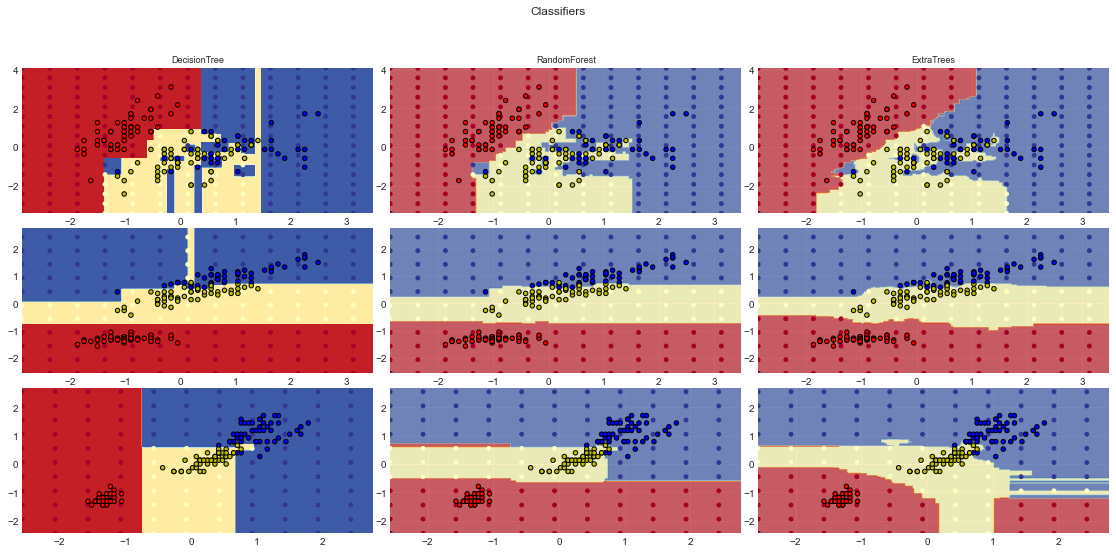

In [320]:
plt.figure(figsize=(16, 8))

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X, y)
        
        model_title = str(type(model)).split('.')[-1][:-2][:-len("Classifier")]
        
        plt.subplot(3, 3, plot_idx)
        
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
            
        else:
            estimator_alpha = 1. / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
                
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                               yy_coarser.ravel()]).reshape(xx_coarser.shape)
        
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolor=None)
        
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolors='k', s=20)
        
        plot_idx += 1
        
plt.suptitle("Classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()
        

### Regressfrom sklearn.datasets import fetch_california_housingor visualization 

In [377]:
from sklearn.datasets import fetch_california_housing

In [383]:
cali = fetch_california_housing()
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=3),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

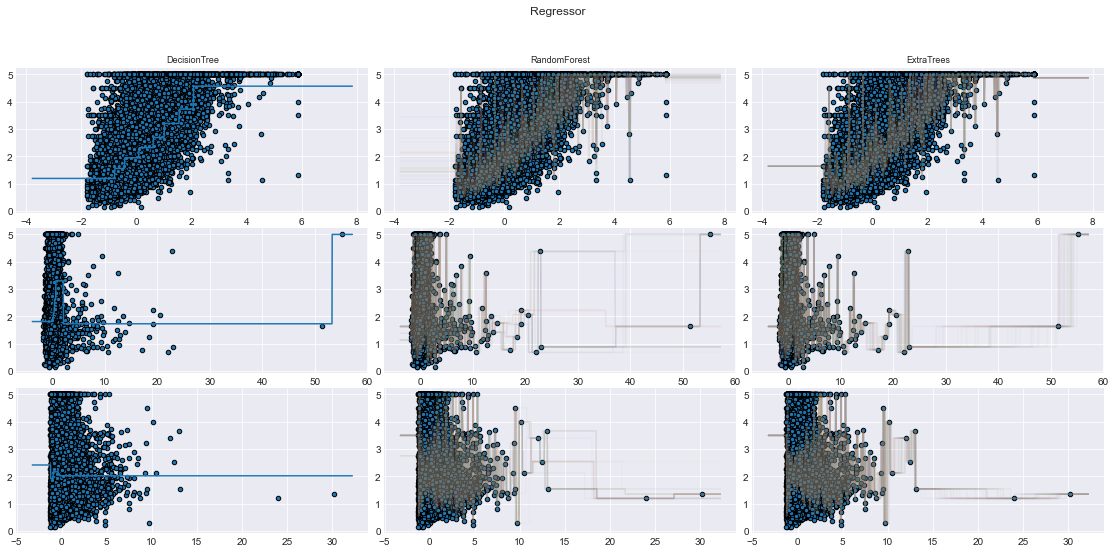

In [384]:
plt.figure(figsize=(16, 8))

for pair in (0, 2, 4):
    
    for model in models:
        
        X = cali.data[:, pair]
        y = cali.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(555)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X-mean) / std
        
        model.fit(X.reshape(-1, 1), y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Regressor")]
        
        plt.subplot(3, 3, plot_idx)
        
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = y.min()+1, y.max()+1
        
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
            
        else:
            estimator_alpha = 1. / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)
                
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx += 1 
        
plt.suptitle("Regressor", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()
        

### AdaBoost
- Boosting algorithm

In [385]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [386]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier())

In [387]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

In [388]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0434101, (+/- 0.0048924)
avg score time: 0.0046009, (+/- 0.0004901)
avg test score: 0.9466667, (+/- 0.0339935)


In [389]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5)

In [390]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0478147, (+/- 0.0042599)
avg score time: 0.0047969, (+/- 0.0003992)
avg test score: 0.8085714, (+/- 0.1682236)


In [392]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [393]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0974306, (+/- 0.0051043)
avg score time: 0.0058012, (+/- 0.0007480)
avg test score: 0.9701133, (+/- 0.0197099)


### Regressor

In [394]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor())

In [395]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5)

In [396]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0616181, (+/- 0.0044116)
avg score time: 0.0030521, (+/- 0.0001072)
avg test score: 0.5821916, (+/- 0.2166180)


In [397]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [398]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0552144, (+/- 0.0066518)
avg score time: 0.0025997, (+/- 0.0004896)
avg test score: 0.4113261, (+/- 0.0662786)


### Gradient Tree Boosting

In [399]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [400]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier())

In [401]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

In [402]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1268431, (+/- 0.0061247)
avg score time: 0.0014010, (+/- 0.0008031)
avg test score: 0.9666667, (+/- 0.0210819)


In [403]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5)

In [404]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1976436, (+/- 0.0049963)
avg score time: 0.0004025, (+/- 0.0004930)
avg test score: 0.9441270, (+/- 0.0244908)


In [405]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5)

In [406]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2728642, (+/- 0.0064646)
avg score time: 0.0008008, (+/- 0.0004004)
avg test score: 0.9578637, (+/- 0.0231090)


#### Regressor

In [407]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor())

In [408]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5)

In [409]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0774188, (+/- 0.0059201)
avg score time: 0.0004018, (+/- 0.0004921)
avg test score: 0.6761905, (+/- 0.1596572)


In [410]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5)

In [411]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0576124, (+/- 0.0016313)
avg score time: 0.0008026, (+/- 0.0004014)
avg test score: 0.4094317, (+/- 0.0690728)


### Voting Classifier

- hard voting
- soft voting

In [412]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [418]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard')

In [419]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f}) [{model_name}]')

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [422]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='soft',
    weights=[2, 1, 2])

In [423]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f}) [{model_name}]')

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### Decision Boundary visualization

In [424]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [425]:
X = iris.data[:, [0, 2]]
y = iris.target

In [429]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(
    estimators=[('dt', model1),
                ('knn', model2),
                ('svc', model3)],
    voting='soft',
    weights=[2, 1, 2])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [431]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

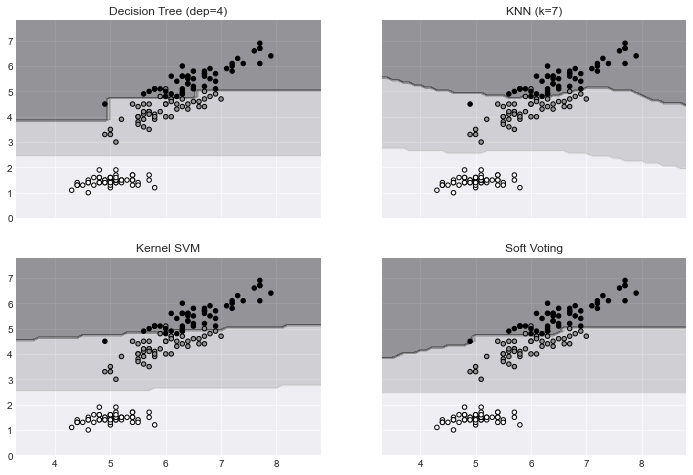

In [432]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (dep=4)', 'KNN (k=7)', 'Kernel SVM',
                           'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

### Voting Regressor 

In [433]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [434]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('Linear', model1), ('GBR', model2), ('Forest', model3)],
    weights=[1, 1, 1])

In [435]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, boston.data, boston.target, cv=5)
    print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f}) [{model_name}]')

Accuracy: 0.35 (+/- 0.38) [LinearRegression]
Accuracy: 0.67 (+/- 0.16) [GradientBoostingRegressor]
Accuracy: 0.62 (+/- 0.21) [RandomForestRegressor]
Accuracy: 0.66 (+/- 0.20) [VotingRegressor]


#### Regression Visualization

In [439]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [440]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('Linear', model1), ('GBR', model2), ('Forest', model3)],
    weights=[1, 1, 1])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [441]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

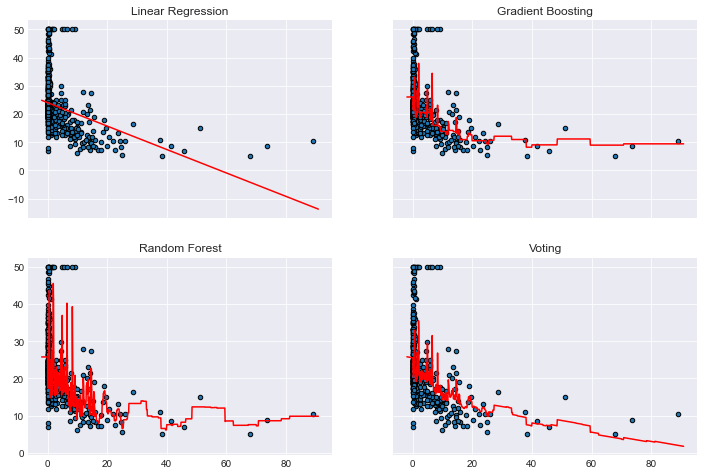

In [445]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

### Stacked Generalization
- effective to reduce model bias
- To avoid overfitting, CV-set based stacking is used

#### Stack Regression

In [447]:
from sklearn.linear_model import Ridge, Lasso 
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [462]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [468]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()))

In [469]:
cross_val = cross_validate(
    estimator=reg,
    X=boston.data, y=boston.target,
    cv=5)

In [470]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0862253, (+/- 0.0016074)
avg score time: 0.0040009, (+/- 0.0000003)
avg test score: 0.3229581, (+/- 0.3301914)


#### Visualization

In [471]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [473]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor())

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

In [474]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

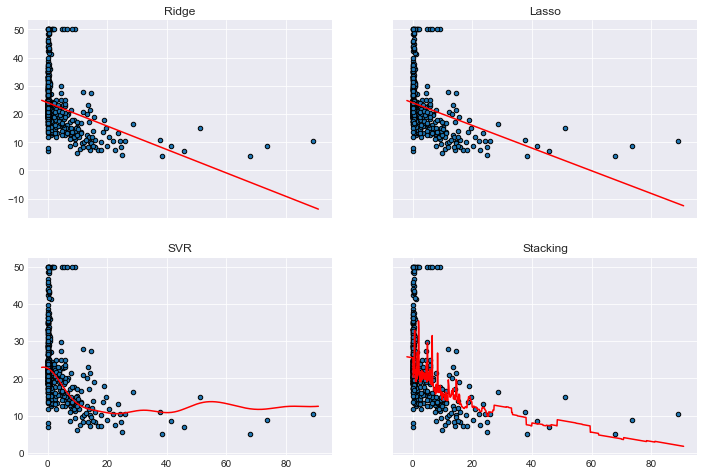

In [475]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stacking']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

#### Stack Classification

In [476]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [477]:
estimator = [('logistic', LogisticRegression(max_iter=10000)),
             ('svc', SVC()),
             ('naive', GaussianNB())]

In [480]:
clf = StackingClassifier(
    estimators=estimator,
    final_estimator=RandomForestClassifier())

In [481]:
cross_val = cross_validate(
    estimator=clf,
    X=iris.data, y=iris.target,
    cv=5)

In [482]:
print('avg fit time: {:.7f}, (+/- {:.7f})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {:.7f}, (+/- {:.7f})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {:.7f}, (+/- {:.7f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2164488, (+/- 0.0102312)
avg score time: 0.0080019, (+/- 0.0006326)
avg test score: 0.9666667, (+/- 0.0210819)


#### Visualization

In [483]:
X = iris.data[:, [0, 2]]
y = iris.target

In [484]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimator,
    final_estimator=RandomForestClassifier())

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [485]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

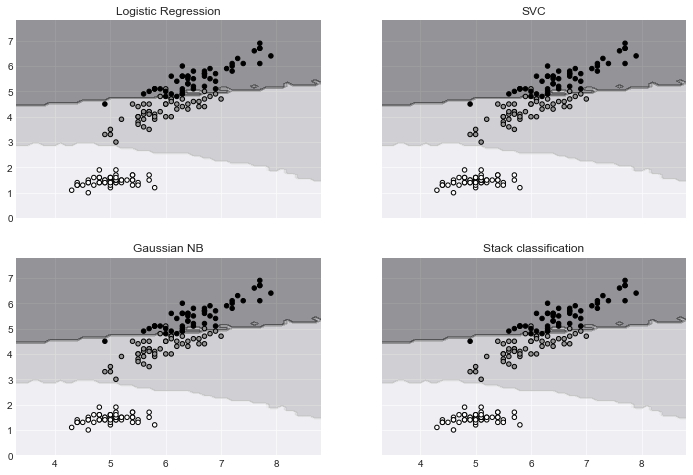

In [487]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Logistic Regression', 'SVC', 'Gaussian NB',
                           'Stack classification']):
    Z = stack.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()